<a href="https://colab.research.google.com/github/17desember2004/belajar/blob/main/UAS_BIG_DATA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving diamonds.csv to diamonds.csv


In [5]:
import pandas as pd
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [10]:
print("Jumlah Data:", len(df))
print("Rata-rata price:", df['price'].mean())
print("Nilai Maksimum price:", df['price'].max())
print("Nilai Minimum price:", df['price'].min())

Jumlah Data: 53940
Rata-rata price: 3932.799721913237
Nilai Maksimum price: 18823
Nilai Minimum price: 326


Unnamed: 0   -0.306873
carat         0.921591
depth        -0.010647
table         0.127134
price         1.000000
x             0.884435
y             0.865421
z             0.861249
Name: price, dtype: float64


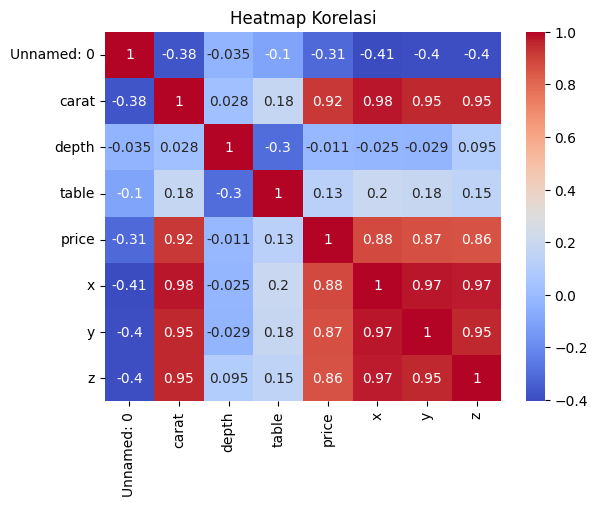

In [11]:
correlation = df.corr(numeric_only=True)
print(correlation['price'])

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()


In [12]:
import statsmodels.api as sm

# Menggunakan hanya variabel numerik untuk prediksi harga
X = df[['carat', 'depth', 'x', 'y', 'z']]
y = df['price']
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 6.430e+04
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:31:55   Log-Likelihood:            -4.7145e+05
No. Observations:               53940   AIC:                         9.429e+05
Df Residuals:                   53934   BIC:                         9.430e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.22e+04    367.643     33.175      0.0

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_const, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, x_train).fit()
y_pred = model.predict(x_test)

print("Data Aktual/Asli Variabel Price:")
for val in y_test[:5].values:
    print(f"[{val}]")

print("\nData Hasil Prediksi pada Variabel Price:")
for val in y_pred[:5].values:
    print(f"[{val:.2f}]")

Data Aktual/Asli Variabel Price:
[559]
[2201]
[1238]
[1304]
[6901]

Data Hasil Prediksi pada Variabel Price:
[123.08]
[2244.93]
[848.69]
[1168.02]
[9735.08]


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 894.5388081795003
MSE: 2282558.0115072113
RMSE: 1510.8136918585333
R-squared: 0.856414188301376
